# **[단순 선형 회귀] 가중치, 편향, 가설 함수, 비용 함수 직접 구현**

In [ ]:
import torch
import torch.optim as optim

#입력 값
x_data=torch.FloatTensor([[1], [2], [3]])
#출력 값
y_data=torch.FloatTensor([[8], [15], [22]])

#가중치
w = torch.zeros(1, requires_grad=True)
#편향
b = torch.zeros(1, requires_grad=True)
#경사 하강법 중 SGD
optimizer = optim.SGD([w, b], lr=0.01)
epoch=2000
for i in range(1, epoch+1):
  #가설 함수
  hypothesis = x_data * w + b
  #비용 함수
  #평균 제곱 오차(MSE) 사용
  cost = torch.mean((y_data - hypothesis)**2)

  #기울기가 누적되지 않도록 0으로 초기화
  optimizer.zero_grad()
  #미분
  cost.backward()
  #파라미터 갱신
  optimizer.step()

  #100번째마다 출력
  if i%100==0:
    print(f'{i}번 반복. 가중치 : {w.item()} 편향 : {b.item()} 비용 : {cost}')
  if i==2000:
    x_data=torch.FloatTensor([[6],[7],[8]])
    hypothesis = x_data * w + b
    print(hypothesis)


100번 반복. 가중치 : 6.397500514984131 편향 : 2.3694889545440674 비용 : 0.27035844326019287
200번 반복. 가중치 : 6.526419639587402 편향 : 2.0765602588653564 비용 : 0.16706514358520508
300번 반복. 가중치 : 6.627722263336182 편향 : 1.84627366065979 비용 : 0.10323638468980789
400번 반복. 가중치 : 6.707355976104736 편향 : 1.665248155593872 비용 : 0.06379348784685135
500번 반복. 가중치 : 6.769955635070801 편향 : 1.5229450464248657 비용 : 0.03942035511136055
600번 반복. 가중치 : 6.819164276123047 편향 : 1.4110817909240723 비용 : 0.024359380826354027
700번 반복. 가중치 : 6.857846736907959 편향 : 1.323148250579834 비용 : 0.015052564442157745
800번 반복. 가중치 : 6.888254642486572 편향 : 1.254023790359497 비용 : 0.009301564656198025
900번 반복. 가중치 : 6.9121575355529785 편향 : 1.19968581199646 비용 : 0.005747844930738211
1000번 반복. 가중치 : 6.930948257446289 편향 : 1.1569716930389404 비용 : 0.003551826113834977
1100번 반복. 가중치 : 6.945718765258789 편향 : 1.1233937740325928 비용 : 0.0021947508212178946
1200번 반복. 가중치 : 6.957329750061035 편향 : 1.0969995260238647 비용 : 0.0013562855310738087
1300번 반복. 

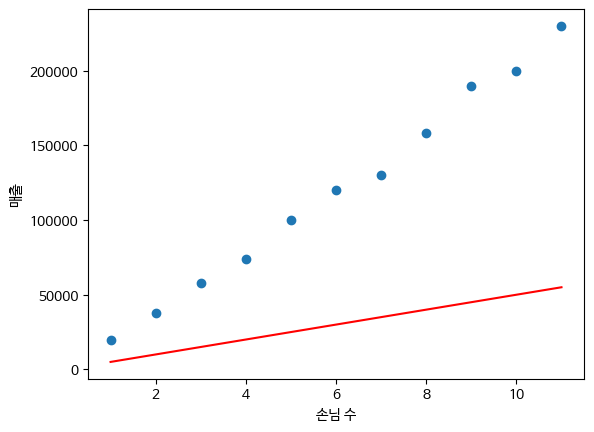

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic')

x=[1,2,3,4,5,6,7,8,9,10,11]
y=[20000, 38000,57800,74000,100000,120000,130000,158000,190000,200000,230000]
plt.scatter(x, y)
plt.xlabel('손님 수')
plt.ylabel('매출')
x=np.arange(1, 12)
y=5000*x
plt.plot(x, y, 'r')

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,040 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and di

# **[단순 선형 회귀] nn.module 사용**

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#입력 값
x_data=torch.FloatTensor([[1], [2], [3], [4]])
#출력 값
y_data=torch.FloatTensor([[19000], [38000], [62000], [80000]])

model = nn.Linear(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
epoch=2000
for i in range(1, epoch+1):
  #가설 함수
  hypothesis = model(x_data)
  #비용 함수
  #평균 제곱 오차(MSE) 사용
  cost = F.mse_loss(hypothesis, y_data)

  #기울기가 누적되지 않도록 0으로 초기화
  optimizer.zero_grad()
  #미분
  cost.backward()
  #파라미터 갱신
  optimizer.step()


  #100번째마다 출력
  if i%100==0:
    w, b = model.parameters()
    print(f'{i}번 반복. 가중치 : {w.item()} 편향 : {b.item()} 비용 : {cost}')
  if i==2000:
    x_data=torch.FloatTensor([[6],[7],[8]])
    hypothesis = model(x_data)
    print(hypothesis)
print(list(model.parameters()))


100번 반복. 가중치 : 18658.1328125 편향 : 4003.333740234375 비용 : 7630329.5
200번 반복. 가중치 : 19187.1015625 편향 : 2448.09716796875 비용 : 4899309.0
300번 반복. 가중치 : 19579.0390625 편향 : 1295.76220703125 비용 : 3400005.0
400번 반복. 가중치 : 19869.439453125 편향 : 441.9526062011719 비용 : 2576906.0
500번 반복. 가중치 : 20084.607421875 편향 : -190.6696014404297 비용 : 2125031.0
600번 반복. 가중치 : 20244.03125 편향 : -659.3985595703125 비용 : 1876963.5
700번 반복. 가중치 : 20362.15625 편향 : -1006.6990966796875 비용 : 1740770.5
800번 반복. 가중치 : 20449.677734375 편향 : -1264.025634765625 비용 : 1666008.625
900번 반복. 가중치 : 20514.52734375 편향 : -1454.687255859375 비용 : 1624961.625
1000번 반복. 가중치 : 20562.576171875 편향 : -1595.9560546875 비용 : 1602429.0
1100번 반복. 가중치 : 20598.17578125 편향 : -1700.62646484375 비용 : 1590058.5
1200번 반복. 가중치 : 20624.5546875 편향 : -1778.181884765625 비용 : 1583267.0
1300번 반복. 가중치 : 20644.099609375 편향 : -1835.6468505859375 비용 : 1579535.375
1400번 반복. 가중치 : 20658.580078125 편향 : -1878.2220458984375 비용 : 1577488.625
1500번 반복. 가중치 : 20669.30859375 

# **[다중 선형 회귀] 가중치, 편향, 가설 함수, 비용 함수 직접 구현**

In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim


#input 차원 : 3 output 차원 : 1

#입력 값
x_data  =  torch.FloatTensor([[73,  80,  75],
                              [93,  88,  93],
                              [89,  91,  80],
                              [96,  98,  100],
                              [73,  66,  70]])
#출력 값
y_data  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])
#가중치
W = torch.zeros((3, 1), requires_grad=True)
#편향
b = torch.zeros(1, requires_grad=True)
#경사 하강법 중 SGD
optimizer = optim.SGD([W, b], lr=0.000001)
epoch=2000
for i in range(1, epoch+1):
  #가설 함수
  hypothesis = torch.matmul(x_data, W) + b
  #비용 함수
  #평균 제곱 오차(MSE) 사용
  cost = torch.mean((y_data - hypothesis)**2)

  #기울기가 누적되지 않도록 0으로 초기화
  optimizer.zero_grad()
  #미분
  cost.backward()
  #파라미터 갱신
  optimizer.step()

  #100번째마다 출력
  if i%100==0:
    print(f'{i}번 반복. 편향 : {b.item()} 비용 : {cost.item()}')
  if i==2000:
    x_data  =  torch.FloatTensor([[90,  90,  90]])
    hypothesis = torch.matmul(x_data, W) + b
    print(hypothesis)


100번 반복. 편향 : 0.007810452487319708 비용 : 10.607980728149414
200번 반복. 편향 : 0.007913565263152122 비용 : 5.958023548126221
300번 반복. 편향 : 0.007924561388790607 비용 : 5.931626319885254
400번 반복. 편향 : 0.007934436202049255 비용 : 5.906009674072266
500번 반복. 편향 : 0.007944254204630852 비용 : 5.880494117736816
600번 반복. 편향 : 0.007954033091664314 비용 : 5.855149269104004
700번 반복. 편향 : 0.007963811978697777 비용 : 5.82991886138916
800번 반복. 편향 : 0.007973531261086464 비용 : 5.804806232452393
900번 반복. 편향 : 0.007983217015862465 비용 : 5.779838562011719
1000번 반복. 편향 : 0.007992872036993504 비용 : 5.754968643188477
1100번 반복. 편향 : 0.008002464659512043 비용 : 5.730220794677734
1200번 반복. 편향 : 0.008012057282030582 비용 : 5.705604553222656
1300번 반복. 편향 : 0.008021563291549683 비용 : 5.681078910827637
1400번 반복. 편향 : 0.00803106278181076 비용 : 5.656692981719971
1500번 반복. 편향 : 0.008040562272071838 비용 : 5.632418155670166
1600번 반복. 편향 : 0.008049995638430119 비용 : 5.6082963943481445
1700번 반복. 편향 : 0.008059401996433735 비용 : 5.584238529205322
1800번 

# **[다중 선형 회귀] nn.module 사용**

In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#input 차원 : 3 output 차원 : 1

#입력 값
x_data  =  torch.FloatTensor([[73,  80,  75],
                              [93,  88,  93],
                              [89,  91,  80],
                              [96,  98,  100],
                              [73,  66,  70]])
#출력 값
y_data  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])
#입력 차원, 출력 차원 파라미터로. model.parameters()를 통해 가중치와 편향 볼 수 있음.
model=nn.Linear(3, 1)

#경사 하강법 중 SGD
optimizer = optim.SGD(model.parameters(), lr=0.000001)
epoch=2000
for i in range(1, epoch+1):
  #가설 함수
  hypothesis = model(x_data)
  #비용 함수
  #평균 제곱 오차(MSE) 사용
  cost = F.mse_loss(hypothesis, y_data)

  #기울기가 누적되지 않도록 0으로 초기화
  optimizer.zero_grad()
  #미분
  cost.backward()
  #파라미터 갱신
  optimizer.step()

  #100번째마다 출력
  if i%100==0:
    print(f'{i}번 반복. 가중치 : {W[0].item()} 편향 : {b.item()} 비용 : {cost.item()}')
  if i==2000:
    x_data  =  torch.FloatTensor([[90,  90,  90]])
    hypothesis = model(x_data)
    print(hypothesis)


100번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 11.665499687194824
200번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 5.059298038482666
300번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 5.039288520812988
400번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 5.020352363586426
500번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 5.001486778259277
600번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.982653617858887
700번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.963953971862793
800번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.945293426513672
900번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.926650047302246
1000번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.908193588256836
1100번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.889777183532715
1200번 반복. 가중치 : 0.6973286867141724 편향 : 0.008087484166026115 비용 : 4.871394157409668


### 배치 경사 하강법 : 모든 데이터를 한 번에 경사 하강법 실시
### 미니 배치 경사 하강법 : 미니 배치 단위로 경사 하강법 실시
### Dataset과 DataLoader를 사용하면 미니 배치 학습, 셔플, 병렬 처리 가능


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


Epoch    0/20 Batch 1/3 Cost: 44651.070312
Epoch    0/20 Batch 2/3 Cost: 6130.141602
Epoch    0/20 Batch 3/3 Cost: 4281.985352
Epoch    1/20 Batch 1/3 Cost: 907.844543
Epoch    1/20 Batch 2/3 Cost: 318.982422
Epoch    1/20 Batch 3/3 Cost: 102.888916
Epoch    2/20 Batch 1/3 Cost: 31.968220
Epoch    2/20 Batch 2/3 Cost: 8.047819
Epoch    2/20 Batch 3/3 Cost: 0.614483
Epoch    3/20 Batch 1/3 Cost: 0.757919
Epoch    3/20 Batch 2/3 Cost: 0.995566
Epoch    3/20 Batch 3/3 Cost: 3.584567
Epoch    4/20 Batch 1/3 Cost: 1.001612
Epoch    4/20 Batch 2/3 Cost: 1.549956
Epoch    4/20 Batch 3/3 Cost: 0.257239
Epoch    5/20 Batch 1/3 Cost: 1.171063
Epoch    5/20 Batch 2/3 Cost: 0.362276
Epoch    5/20 Batch 3/3 Cost: 1.455267
Epoch    6/20 Batch 1/3 Cost: 0.169162
Epoch    6/20 Batch 2/3 Cost: 2.013858
Epoch    6/20 Batch 3/3 Cost: 0.347844
Epoch    7/20 Batch 1/3 Cost: 0.958709
Epoch    7/20 Batch 2/3 Cost: 1.133262
Epoch    7/20 Batch 3/3 Cost: 0.438591
Epoch    8/20 Batch 1/3 Cost: 1.067632
Epoch   

### 로지스틱 회귀를 통해 이진 분류 문제 해결

### **가설**
$$ H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b) $$

### **비용 함수**
$$ cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 $$

In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 입력 값
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
# 출력 값
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

optimizer=optim.SGD(model.parameters(), lr=1)


epochs=2000
for epoch in range(1, epochs+1):

  # 가설
  hypothesis = model(x_train)
  # 비용 함수
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%10==0:
    prediction = hypothesis > torch.FloatTensor([0.5])
    correct_prediction = prediction.float()==y_train
    print(f'{epoch}번 반복. 편향 : {b.item()} 비용 : {cost.item()} 정확도 : {correct_prediction.sum().item()/len(correct_prediction)}')

hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))
print(hypothesis)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(W, b)


10번 반복. 편향 : -17.4246768951416 비용 : 0.6773098111152649 정확도 : 0.6666666666666666
20번 반복. 편향 : -17.4246768951416 비용 : 0.6290845274925232 정확도 : 0.8333333333333334
30번 반복. 편향 : -17.4246768951416 비용 : 0.5220338702201843 정확도 : 0.8333333333333334
40번 반복. 편향 : -17.4246768951416 비용 : 0.4345872402191162 정확도 : 0.8333333333333334
50번 반복. 편향 : -17.4246768951416 비용 : 0.35128068923950195 정확도 : 0.8333333333333334
60번 반복. 편향 : -17.4246768951416 비용 : 0.2736521065235138 정확도 : 0.8333333333333334
70번 반복. 편향 : -17.4246768951416 비용 : 0.2087664157152176 정확도 : 0.8333333333333334
80번 반복. 편향 : -17.4246768951416 비용 : 0.1676834225654602 정확도 : 1.0
90번 반복. 편향 : -17.4246768951416 비용 : 0.14922919869422913 정확도 : 1.0
100번 반복. 편향 : -17.4246768951416 비용 : 0.13845805823802948 정확도 : 1.0
110번 반복. 편향 : -17.4246768951416 비용 : 0.12942089140415192 정확도 : 1.0
120번 반복. 편향 : -17.4246768951416 비용 : 0.12151431292295456 정확도 : 1.0
130번 반복. 편향 : -17.4246768951416 비용 : 0.11453530192375183 정확도 : 1.0
140번 반복. 편향 : -17.4246768951416 비용 : 0.1

### 소프트 맥스 회귀를 통해 다중 클래스 분류 문제 해결

### **가설**
$$ H(X) = softmax(WX + B) $$

### **비용 함수**
$$ cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) $$

In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# 원 핫 인코딩 수행
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

# 가중치
W = torch.zeros((4, 3), requires_grad=True)
# 편향
b = torch.zeros((1, 3), requires_grad=True)
# 최적화
optimizer = optim.SGD([W, b], lr=0.1)

epochs = 2000
for epoch in range(1, epochs+1):
  # 가설
  hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

  # 비용 함수
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  # 기울기 누적 안되게
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(f'{epoch}번 반복 cost : {cost.item()}')

100번 반복 cost : 0.6497359275817871
200번 반복 cost : 0.564854621887207
300번 반복 cost : 0.5101341009140015
400번 반복 cost : 0.46564871072769165
500번 반복 cost : 0.42613905668258667
600번 반복 cost : 0.3892519772052765
700번 반복 cost : 0.3534810543060303
800번 반복 cost : 0.3176612854003906
900번 반복 cost : 0.28117257356643677
1000번 반복 cost : 0.24821345508098602
1100번 반복 cost : 0.23279446363449097
1200번 반복 cost : 0.2215062379837036
1300번 반복 cost : 0.21122723817825317
1400번 반복 cost : 0.2018263339996338
1500번 반복 cost : 0.1931958943605423
1600번 반복 cost : 0.1852458119392395
1700번 반복 cost : 0.1778998225927353
1800번 반복 cost : 0.17109264433383942
1900번 반복 cost : 0.16476821899414062
2000번 반복 cost : 0.15887796878814697


In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# 원 핫 인코딩 수행
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

# 가중치
W = torch.zeros((4, 3), requires_grad=True)
# 편향
b = torch.zeros((1, 3), requires_grad=True)
# 최적화
optimizer = optim.SGD([W, b], lr=0.1)

epochs = 2000
for epoch in range(1, epochs+1):

  z = x_train.matmul(W) + b

  # 비용 함수
  cost = F.cross_entropy(z, y_train)

  # 기울기 누적 안되게
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(f'{epoch}번 반복 cost : {cost.item()}')

100번 반복 cost : 0.6497359275817871
200번 반복 cost : 0.5648547410964966
300번 반복 cost : 0.5101341605186462
400번 반복 cost : 0.4656486213207245
500번 반복 cost : 0.426139235496521
600번 반복 cost : 0.38925206661224365
700번 반복 cost : 0.35348111391067505
800번 반복 cost : 0.31766146421432495
900번 반복 cost : 0.2811729311943054
1000번 반복 cost : 0.24821355938911438
1100번 반복 cost : 0.23279452323913574
1200번 반복 cost : 0.221506267786026
1300번 반복 cost : 0.21122723817825317
1400번 반복 cost : 0.20182636380195618
1500번 반복 cost : 0.19319598376750946
1600번 반복 cost : 0.18524591624736786
1700번 반복 cost : 0.17789986729621887
1800번 반복 cost : 0.1710927039384842
1900번 반복 cost : 0.16476832330226898
2000번 반복 cost : 0.15887810289859772


In [ ]:
from warnings import WarningMessage
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# 원 핫 인코딩 수행
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

# 4개의 특성으로 3개의 클래스 분류
model = nn.Linear(4, 3)

# 최적화
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 2000
for epoch in range(1, epochs+1):

  prediction = model(x_train)
  # 비용 함수
  cost = F.cross_entropy(prediction, y_train)

  # 기울기 누적 안되게
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(f'{epoch}번 반복 cost : {cost.item()}')

100번 반복 cost : 0.7170552611351013
200번 반복 cost : 0.6314190626144409
300번 반복 cost : 0.5733143091201782
400번 반복 cost : 0.5226397514343262
500번 반복 cost : 0.4749322235584259
600번 반복 cost : 0.4285452365875244
700번 반복 cost : 0.3827027976512909
800번 반복 cost : 0.33708590269088745
900번 반복 cost : 0.29215317964553833
1000번 반복 cost : 0.252869188785553
1100번 반복 cost : 0.23490232229232788
1200번 반복 cost : 0.223446324467659
1300번 반복 cost : 0.21302132308483124
1400번 반복 cost : 0.20349016785621643
1500번 반복 cost : 0.19474296271800995
1600번 반복 cost : 0.18668776750564575
1700번 반복 cost : 0.17924684286117554
1800번 반복 cost : 0.17235365509986877
1900번 반복 cost : 0.16595101356506348
2000번 반복 cost : 0.15998949110507965


In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# GPU 사용 가능하면 사용. 아니면 CPU 사용.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# hyperparameters
training_epochs = 30
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(
    root='MNIST_DATA/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
mnist_test = dsets.MNIST(
    root='MNIST_DATA/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

# 784개의 특성을 통해 10개의 클래스 분류
# to() 함수는 연산을 수행할 곳. GPU를 사용할 경우 to('cuda') 필요. CPU를 사용하면 없어도 됨
# bias=True하면 편향 사용. default 값이 True
linear = nn.Linear(784, 10, bias=True).to(device)

# 비용 함수
criterion = nn.CrossEntropyLoss().to(device)
# 옵티마이저
optimizer = optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(1, training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for X, Y in data_loader:
    X = X.view(-1, 28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

  avg_cost += cost / total_batch
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))



Epoch: 0002 cost = 0.000745395
Epoch: 0003 cost = 0.000526893
Epoch: 0004 cost = 0.000488657
Epoch: 0005 cost = 0.000812200
Epoch: 0006 cost = 0.000507632
Epoch: 0007 cost = 0.000772934
Epoch: 0008 cost = 0.000451853
Epoch: 0009 cost = 0.000409172
Epoch: 0010 cost = 0.000471889
Epoch: 0011 cost = 0.000444427
Epoch: 0012 cost = 0.000645904
Epoch: 0013 cost = 0.000496380
Epoch: 0014 cost = 0.000351971
Epoch: 0015 cost = 0.000412670
Epoch: 0016 cost = 0.000684984
Epoch: 0017 cost = 0.000409654
Epoch: 0018 cost = 0.000665562
Epoch: 0019 cost = 0.000536006
Epoch: 0020 cost = 0.000321658
Epoch: 0021 cost = 0.000687002
Epoch: 0022 cost = 0.000260121
Epoch: 0023 cost = 0.000209766
Epoch: 0024 cost = 0.000405777
Epoch: 0025 cost = 0.000486002
Epoch: 0026 cost = 0.000388955
Epoch: 0027 cost = 0.000359079
Epoch: 0028 cost = 0.000459623
Epoch: 0029 cost = 0.000355351
Epoch: 0030 cost = 0.000537880


8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


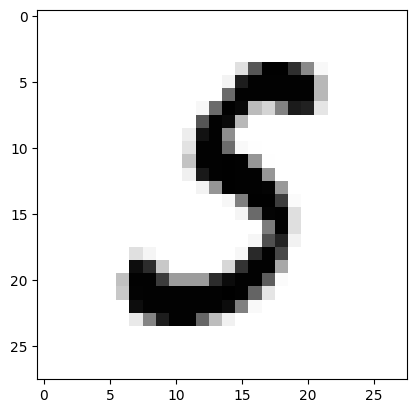

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    print(torch.sum(correct_prediction).item())
    print(len(correct_prediction))
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()


8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


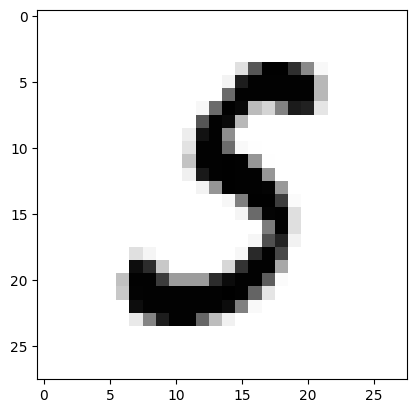

8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


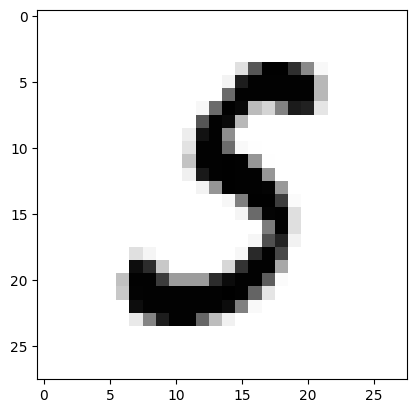